# K-Means Clustering with Scikit-Learn

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
df = pd.read_csv('Mall_Customers.csv')
df.shape

(200, 5)

In [4]:
# View top 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# View statistical details
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Group by Gender
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [8]:
# Let's prepare data for clusting - select 2 features
customers_df = df[['Annual Income (k$)','Spending Score (1-100)']]
customers_df.shape

(200, 2)

In [9]:
# View top 5 rows
customers_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


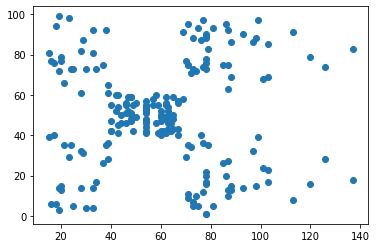

In [10]:
# Let's plot scatter plot as data is 2D
plt.scatter(customers_df["Annual Income (k$)"], customers_df["Spending Score (1-100)"]);

### Hopkins Statistics
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, i.e. how well the data can be clustered.

In [11]:
# Importing packages
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [12]:
# Function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins_statistic(customers_df)

0.6960439365059609

In [14]:
for i in range(100):
    print(hopkins_statistic(customers_df), end=" | ")

0.7675846938460912 | 0.7667398686742263 | 0.7783744571385531 | 0.8001887303927064 | 0.7342832892624659 | 0.7982278649844299 | 0.789630347202827 | 0.7617181437709478 | 0.8301456011642759 | 0.8013484681154022 | 0.7491169234422401 | 0.8038050883599679 | 0.7512239375100707 | 0.7815100361449178 | 0.7796800562189437 | 0.7880944395870197 | 0.7452396388045641 | 0.7215694634514732 | 0.738789365934529 | 0.7548593615968535 | 0.7604707568879477 | 0.7673300812086962 | 0.7590444737863723 | 0.7327325249055248 | 0.7776873569596542 | 0.749012917639729 | 0.7163059387277317 | 0.8009004329783285 | 0.7189397806343099 | 0.7879718487919037 | 0.7670757278030318 | 0.7386555065363155 | 0.7557889025436465 | 0.8007258029246278 | 0.8019024279127008 | 0.6584917365523447 | 0.7702241549748053 | 0.7582212777745014 | 0.7848931262837189 | 0.7918790409230806 | 0.7301542927399011 | 0.7041245580506971 | 0.7779274538746284 | 0.6536447802977042 | 0.8209444379802262 | 0.7966175965318542 | 0.8050463725004708 | 0.76445554279458

In [15]:
hopkins_stat = []
for i in range(100):
    hopkins_stat.append(hopkins_statistic(customers_df))
print(sum(hopkins_stat)/len(hopkins_stat))

0.7715294887655769


## Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Function to create and plot clusters
def cluster_data(num):
    kmeans = KMeans(n_clusters=num)
    kmeans.fit(customers_df)
    plt.scatter(customers_df['Annual Income (k$)'], customers_df['Spending Score (1-100)'], c= kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c= 'black')
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.show()

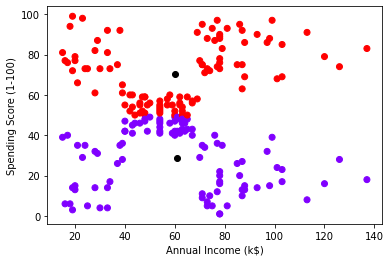

In [18]:
# K-Mean with 2 clusters
cluster_data(2)

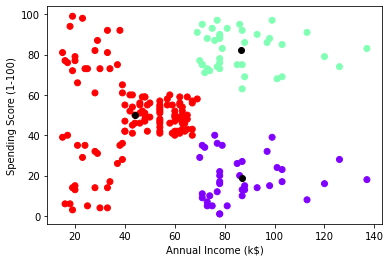

In [19]:
# K-Mean with 3 clusters
cluster_data(3)

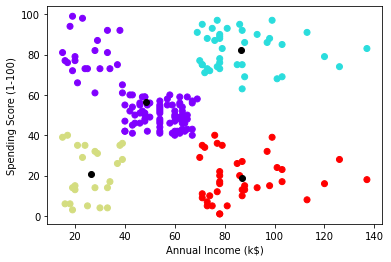

In [20]:
# K-Mean with 4 clusters
cluster_data(4)

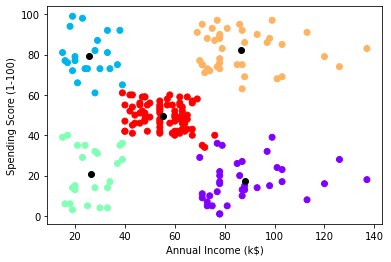

In [21]:
# K-Mean with 5 clusters
cluster_data(5)

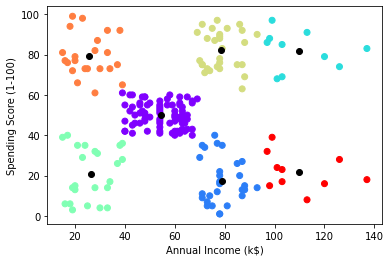

In [22]:
# K-Mean with 7 clusters
cluster_data(7)

## Final Optimal Number of Clusters

### Elbow Method

In [23]:
wcss = [] # within cluster sum of squares
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customers_df)
    wcss.append(kmeans.inertia_)
print(wcss)

[181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30273.394312070028, 25031.41895274514, 21818.11458845217, 19657.783608703947]


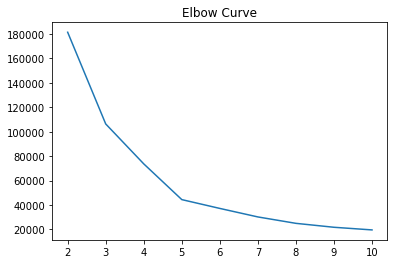

In [24]:
plt.plot(range(2,11), wcss)
plt.title("Elbow Curve")
plt.show()

### Silhoutte Analysis

In [25]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(customers_df)
    sse_.append([k, silhouette_score(customers_df, kmeans.labels_)])
sse_

[[2, 0.39564531743995546],
 [3, 0.46761358158775435],
 [4, 0.4931963109249047],
 [5, 0.553931997444648],
 [6, 0.5393922132561455],
 [7, 0.5281944387251989],
 [8, 0.4585133619741466],
 [9, 0.4569479922714121],
 [10, 0.44973539403790147],
 [11, 0.437841976811071],
 [12, 0.42466125581857567],
 [13, 0.43211339472104393],
 [14, 0.43670689382690253]]

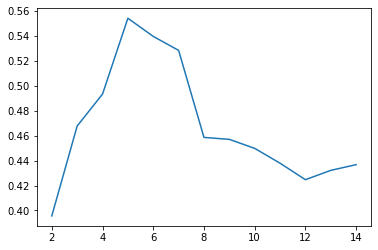

In [26]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

Looking at the results of Elbow and Silhoutte, we understand the right number of cluster seems to 5.

### Final Model

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers_df)

KMeans(n_clusters=5)

In [28]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [29]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [30]:
# Assign labels to data points
customers_df['Labels'] = kmeans.labels_
customers_df.head()

,Annual Income (k$),Spending Score (1-100),Labels
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


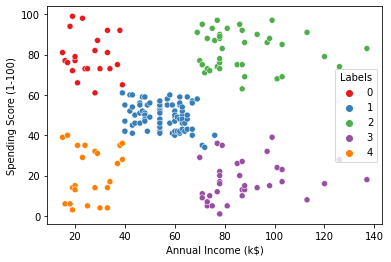

In [31]:
# Plotting
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Labels', data=customers_df, palette='Set1');

In [32]:
customers_df.groupby('Labels').mean()

,Annual Income (k$),Spending Score (1-100)
Labels,,
0,25.727273,79.363636
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,26.304348,20.913043


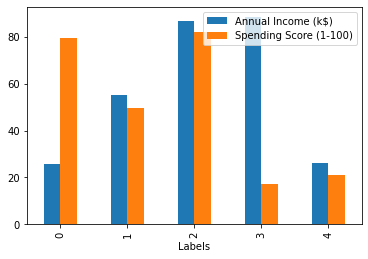

In [33]:
customers_df.groupby('Labels').mean().plot(kind='bar');